## PHYS 481 Assignment 4

October 28, 2018

Kenneth Sharman (00300185)

In [1]:
'''Import standard packages'''
import numpy as np
import matplotlib.pyplot as plt


### Introduction

In this week’s assignment we will be investigating a model of magnetic materials. We will use the knowledge acquired from going through the game of life in the previous assignment, to make an attempt to model the transitional behavior of a magnet. We will again concentrate on a probabilistic approach to our model, however this report will contain a substantial amount of physics, compared to our previous write ups. 
We begin by going through the basics of the well known Ising model.

#### The Ising Model

The Ising model is a theoretical model of a magnet. The magnetization of a material is produced by the combination of the magnet dipoles within the material. If these magnetic dipoles are totally random, then their sum will produce a magnetization near zero. In contrast, if many of them point in the same direction, then the material will have a macroscopic non-zero magnetization.

The Ising model is a simplified model in which there are only two directions the dipoles can point; up or down. In quantum mechanics it can be shown that an electron's spin and magnetic moment (discussed below) are proportional to eachother$^1$. Thus, we refer to the dipole directions as $+1$ spin and $-1$ spin, respectively. The material is modeled by a lattice or array. We will deal with lattices in one or two dimensions, however the model can be extended to any number of dimensions. 

The individual diploes will interact with a magnetic field in such a way that it is energetically favorable for them to line up with the magnetic field. To expand on this, the concepts of dipole moment and potential energy must be discussed.

#### Magnetic Dipole Moment and its Potential Energy

Recall that the concept of the magetic dipole is easily defined when considering a loop of current. In our study of electromagnetism, the Bio-Savart law establishes that moving charges produce a magnetic field. In the case of a loop of current, a magnetic dipole is produced and we define the magnetic moment as

$$\mu = I \; A$$

Where $\mu$ is the magnetic dipole moment, $I$ is the current in loop, and $A$ is the area of the loop. We will not be considering this definition in this report, however it makes it easy to conceptualize the magnetic moment. Orbiting electrons in an atom can be viewed as a loop of current, hence every atom has a magnetic dipole moment.

The magnetic moment can be considered to be a vector quantity with direction perpendicular to the current loop (using right-hand rule). The torque is given by

$$\vec \tau = \vec{\mu} \times \vec{\text{B}} $$

Since the torque tries to line up the magnetic moment with the magnetic field, the lowest energy configuration is when $\mu$ and $\text{B}$ point in the same direction. Thus, we can express the potential energy as

$$\text{U} = - \vec{\mu} \cdot \vec{\text{B}} = -\mu \text{B} \cos{\theta} $$

Where $\theta$ represents that angle between the two vectors. Note that the minus sign is essential to ensure that the interactions are ferromagnetic; the energy is minimized when the vectors are aligned.

In the highest energy configuration, where the two vectors are pointing in opposite directions, $\text{U} = \mu \text{B}$ and in the lowest configuration (anti-aligned), $U=-\mu \text{B}$.

#### An Ising Chain
The goal of this report is to construct a two-dimensional Ising model, however we must build it up from the basics. First, we consider $N$ magnetic dipoles fixed in place in a linear chain.

Since every dipole has two possible states (spin) $S = \pm 1$, a chain of $N$ dipoles has $2^N$ possible configurations. It is easy to see that even for modest values of $N$ simply calculating the number of possible configurations becomes computationaly expensive. A discussion of statistical mechanics becomes essential to the construction of the model.

#### A Probabalistic Approach

Consider a system in thermal equilibrium with a heat-sink of temperature T, where the exact state of the system is unknown. At any particular moment the probablity of it occupying state $i$ with energy $E_i$ is given by the Boltzmann formula$^1$

$$ p_i = \frac{e^{-\beta E_i}}{Z} \qquad \text{where} \qquad Z = \sum_{i}^{N} e^{- \beta E_i} $$

The quantity beta $\beta = \frac{1}{k_B T}$ where $k_B = 8.6173303 \; e-5 \frac{eV}{K}$ is the Boltzmann constant and $T$ is temperature in Kelvin.

The quantity $Z$ is known as the partition function, which normalizes the probabilties such that there sum is equal to one. In general it is not known, and quite expensive to calculate. Before we analyze the complexity, the energy states and corresponding probablities are investigated for a one-dimensional Ising chain.

#### Question: Write a function which will calculate all of the energy states and probabilities for an arbitrary number of independent dipoles.  Tabulate the results for $N=3$, $\beta=0.1$ and $B=2$

Consider a collection of $N$ independent dipoles with state $S=\pm 1$ in an external magnetic field $B$.  The energy associated with the entire system is given by  

$$ E = - \mu B \sum_k S_k $$
  
This expression for the energy will allow us to calculate the probability associated with each state. For simplicity, we will use magentic moment equal to one, $\mu = 1 A m^2$. The energy equation is then

$$ E = - B \sum_k S_k $$

First, we define a class that can be used to instantiate a one-dimensional Ising chain$^2$.

In [2]:
'''Import package used to replace iteration method in calc_all_configs'''
from itertools import product

class IsingChain:
    '''
    Class used to instantiate a one-dimensional ising chain. Instance variables
    include; chain length (N), magentic field (B), and beta (k_B * T). Instance
    methods include; calc_energy, calc_all_configs (all possible configurations
    of chain length N), calc_all_e (energy of each possible configuration),
    calc_probs (probability of each configuration), randomize_state (randomly
    select configuration).
    '''
    def __init__(self, N, B, beta):
        '''
        Constructor initializes N, B, and beta
        Parameters:
            N - number of dipoles in chain
            B - Magnetic field in eV/(A*m^2)
            beta - 1/(k_B * T) with units of 1/eV
        '''
        self.n_val = N # Length of Ising Chain
        self.b_val = B # Magentic Field (eV/Am^2)
        self.beta = beta # 1/(k_B * T)

        # call function that does initial calculations
        self.__init__generate_all_state_data()

    def calc_energy(self, a_state):
        '''
        Calculates energy of chain configuration
        Parameters: a_state - ising chain spins
        Returns: E = -B * sum of states (eV)
        '''
        return -self.b_val * np.sum(a_state)

    def calc_all_configs(self):
        '''
        Determines all possible spin-up and spin-down configurations of Ising
        Chain of length n_val. Initializes all_states variable with array
        containing lists of each state.
        '''
        # List comprehension used in conjunction with itertools.product which
        #is equivalent to nested for-loops. This one line statement iterates
        # through all possible configurations of +/-1 repeated N times
        self.all_states = np.array([np.array(i) for i in product([1, -1], repeat=self.n_val)])

    def calc_all_e(self):
        '''
        Calculates energies for all configurations found in all_states instance
        variable. Initializes e_of_states variable with array of energies.
        '''
        # For each configuration of spins; calculate E= -B * sum spins
        self.e_of_states = np.array([-self.b_val * np.sum(state) for state in self.all_states])

    def calc_partition(self):
        '''
        Calculates the partition function, given energies of all possible
        configurations. Initializes Z variable with this normalizing constant.
        '''
        self.z_val = np.sum([np.exp(-self.beta*e) for e in self.e_of_states])

    def calc_probs(self):
        '''
        Calculates the probability of being in each of the possible
        configurations, using Blotzmann formula. Initializes prob_all_states
        variable with array of probabilities.
        '''
        self.prob_all_states = np.array([np.exp(-self.beta*E) \
                                         for E in self.e_of_states]) / self.z_val

    def randomize_state(self):
        '''
        Randomly selects one possible spin configuration using Boltzmann
        probabilities. Assigns this spin configuration to state variable and
        assigns corresponding energy to e instance variable.
        '''
        # Randomly select index of possible state
        index = np.random.choice(np.arange(len(self.all_states)), p=self.prob_all_states)
        self.state = self.all_states[index] # assign spin config to state instance variable
        self.e_val = self.calc_energy(self.state)
        # calculate and assign energy of state to e instance variable

    def __init__generate_all_state_data(self):
        '''
        Function called from default constructor. Calls all instance functions,
        which initializes all spin configurations, corresponding energies,
        partition function, corresponding probabilities, and randomizes the
        Ising Chain.
        '''
        self.calc_all_configs()
        self.calc_all_e()
        self.calc_partition()
        self.calc_probs()
        self.randomize_state()


Using this class we can instantiate an Ising chain of length 3, and display all energy states and probabilities using the Pandas package.

In [3]:
'''Instantiate Ising Chain'''
ISING_MODEL = IsingChain(N=3, B=2, beta=0.1)


In [4]:
'''Import Pandas package for table creation'''
import pandas as pd

DF1 = pd.DataFrame({
    'S1': [state[0] for state in ISING_MODEL.all_states],
    'S2': [state[1] for state in ISING_MODEL.all_states],
    'S3': [state[2] for state in ISING_MODEL.all_states],
    'Energy': ISING_MODEL.e_of_states,
    'Probabliity': ISING_MODEL.prob_all_states
})

print('Energies and Probabilities corresponding to B=2 and beta=0.1')
print(DF1)
print('\nSum of Probabilities = ', np.sum(ISING_MODEL.prob_all_states))


Energies and Probabilities corresponding to B=2 and beta=0.1
   Energy  Probabliity  S1  S2  S3
0      -6     0.214586   1   1   1
1      -2     0.143841   1   1  -1
2      -2     0.143841   1  -1   1
3       2     0.096420   1  -1  -1
4      -2     0.143841  -1   1   1
5       2     0.096420  -1   1  -1
6       2     0.096420  -1  -1   1
7       6     0.064632  -1  -1  -1

Sum of Probabilities =  1.0


As a quick test the sum of the probabilities was printed, as we must have a total of 1. The largest probability corresponds to the configuration where each spin is up. The lowest probability corresponds to the configuration where each spin is down. These configurations have the minimum and maximum energy states, respectively. This makes sense, as we expect an increased chance that the dipoles will be aligned with the magnetic field. We can think of this as the dipoles to be "seeking" the lowest energy state.

#### Question: Write a function which will return a Boltzmann random state for an arbitrary number $N$ of independent dipoles.  Plot the time required to produce the result as a function of $N$.  Discuss your results.

Using the Ising Chain class defined above we can instantiate a range of chain lengths and use the timeit package to time how long the randomize function takes. Note that the total time could be veiwed to include the instantiation time as well, which is significantly longer, however it will be seen that simply calling the randomize function results in non-linear runtime.

In [5]:
'''Import timeit package to evaluate runtimes'''
import timeit

TIME1 = [] # Lists for average runtimes
N_VALS = np.arange(2, 20) # Range of N sizes

# For each chain length (2-20) evaluate runtime and store in time1 list
for n in N_VALS:
    model = IsingChain(N=n, B=2, beta=0.1)
    TIME1.append(timeit.timeit(model.randomize_state, number=100))
    

Next, we plot the runtimes against the Ising Chain lengths.

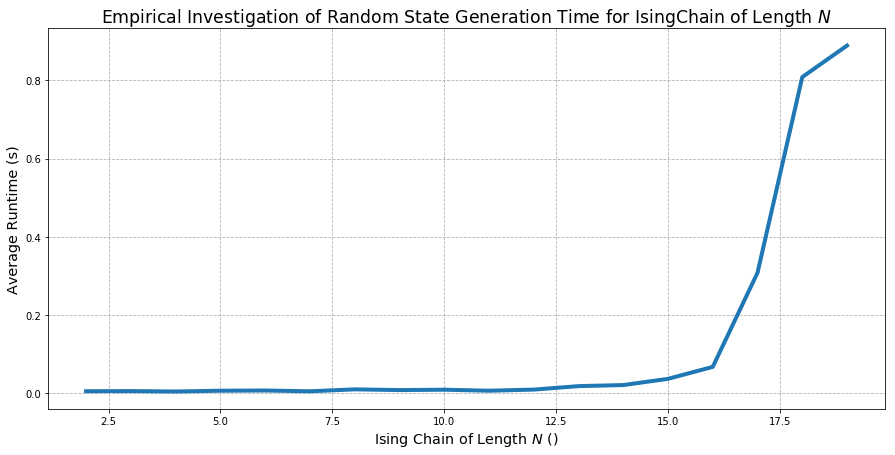

In [6]:
'''Create plot'''
plt.figure(figsize=(15, 7)) # Set the plot size

# Plot running times
plt.plot(N_VALS, TIME1, linewidth=4)

# Label Plot
plt.xlabel("Ising Chain of Length $N$ ()", fontsize='x-large')
plt.ylabel("Average Runtime (s)", fontsize='x-large')
plt.title("Empirical Investigation of Random State Generation Time for Ising" \
          "Chain of Length $N$", fontsize='xx-large')

plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

plt.show()


As previously mentioned, simply calling the randomize function results in non-linear runtime. In fact, it appears to have an exponential relationship with the chain length. Clearly, calculating the Boltzmann probabilities is quite expensive and impractical for larger systems.

It has been shown that the Metropolis algorithm (discussed below) can be viewed as an effective alternative approach. The next question deals with the implementation of this algorithm.

#### Question: Use the metropolis algorithm to generate a sequence of states for a single dipole with T=300K, dE=0.1, 1, 10eV.  Calculate the expected probabilities for each state and compare to the computed results for 1000 iterations.

In a simulation of neutron transmission through matter, Nicholas Metropolis invented an algorithm to improve the Monte Carlo calculation of averages. Referred to as the $\textit{Metropolis algorithm}$, this alogrithm is widely considered to be a cornerstone of computational physics because the sequence of configurations it produces (a $\textit{Markov Chain}$) accurately simulates the fluctuations that occur during thermal equilibrium$^1$.

The algorithm flips the dipole spins in a manner that, on average, produces spin configurations that occur in accordance with the probabilities that can be calculated from the Boltzmann distribution.

The Metropolis algorithm is implemented via a number of steps$^1$.

1. Start with a random configuration of spins
2. Generate a trial configuration of spins by flipping the spin of a randomly selected dipole
3. Calculate energy $E_1$ of the trial configuration
4. If $E_1\leq E_0$ accept the trial
5. If $E_1\gt E_0$ accept with relative probablilty $p=e^{-\frac{\Delta E}{k_B T}}$

Recall that we have defined the energy of a configuration to be
$$ E = -B \sum_k S_k $$

We can use IsingChain as a parent class, and define a subclass the implements the functions required to implement this algorithm. 

In [7]:
'''Extend IsingChain Class'''
class SingleDipole(IsingChain):
    '''
    Subclass of IsingChain. Implements the metropolis algorithm for a single
    dipole. Extended methods include generate_trail_configuration (by flipping
    single dipole), run_metropolis (accepts or rejects trial and updates state
    and e_val), and get_sequence (a list of spin states produced by multiple
    iterations of the metropolis algorithm).
    '''
    def generate_trial_config(self):
        '''
        Flips the spin of single dipole. Assigns flipped spin to trial_state
        and energy to trial_e
        '''
        self.trial_state = -1 * self.state
        self.trial_e = self.calc_energy(self.trial_state)

    def run_metropolis(self):
        '''
        Runs metropolis algorithm on single dipole.
        '''
        if self.trial_e <= self.e_val: # If E1 <= E0 accept trial state and update state variable
            self.state = self.trial_state
        else: # If E1 > E0 accept trial with relative probability p= exp(-dE * beta)
            p_accept = np.exp(-(self.trial_e - self.e_val) * self.beta)
            self.state = np.array([np.random.choice([self.state[0], \
                        self.trial_state[0]], p=[1-p_accept, p_accept])])

        self.e_val = self.calc_energy(self.state) # Update energy state

    def get_sequence(self, num_iterations):
        '''
        Runs the metropolis algorithm for num_iterations cycles. Returns an
        array of spin configurations after each pass of alogirthm.
        '''
        spin_array = np.array([]) # Empty array to hold spin configurations

        # For each pass; generate trial config, run algorithm, and add resultant spin to array
        for _ in range(num_iterations):
            self.generate_trial_config()
            self.run_metropolis()
            spin_array = np.append(spin_array, self.state[0])

        return spin_array
    

Using this subclass, we can define a set of functions that will calculate the mean and standard deviation for the number of aligned dipoles (aligned with magnetic field- spin up) over an arbitrary number of iterations of the metropolis algorithm.

In [8]:
'''Define function that calculates mean and std deviation of elements in a list'''
def list_stats(a_list):
    '''
    Numpy functions are used to calculate the mean and standard deviation of
    parameter array elements
    Returns: means, std: Mean and standard deviation
    '''
    mean = np.round(np.mean(a_list), 1)
    std = np.round(np.std(a_list), 1)

    return mean, std


In this question we are given the energy difference. I will take this to be the magnitude of energy difference between spin-up and spin-down, i.e. 

$$ dE = |\; E_{+} - E_{-} \;| $$

Since:

$$ E = -B \sum_k S_k \qquad \Rightarrow \qquad E_{+} = -B \; \text{,} \; E_{-} = B $$

We have:

$$ dE = 2B \qquad \Rightarrow \qquad B = \frac{dE}{2} $$

Therefore, given the energy difference, we can determine the appropriate magnetic field (required to instantiate the IsingChain object). Remember, the only reason the units work out here is because we set the dipole moment $\mu = 1 A m^2$.

In [9]:
'''Define function that calculates stats for single dipole using metropolis alogirthm'''
def single_dipole_stats(de_val, t_val, iterations=1000, sample_size=10):
    '''
    Function runs the metropolis algorithm with a single dipole for arbitrary number of
    iterations.
    Parameters
        dE: Difference in energy from spin up to spin down (eV)
        T: Temperature (K)
        iterations: Runs of algorithm. Default value of 1000
        sample_size: Number of times experiment is repeated
    Returns: Mean, standard deviation, and Boltzmann porbabilities
    '''
    list_num_aligned = np.array([]) # Number of spin up dipoles over all iterations

    k = 8.6173303*10**(-5) # Boltzmann constant (eV/K)

    # Instantiate single dipole with B = dE/2
    dip = SingleDipole(N=1, B=(de_val/2), beta=1/(k*t_val))

    for _ in range(sample_size):
        spin_list = dip.get_sequence(iterations) # Get spin progression over iterations
        _, counts = np.unique(spin_list, return_counts=True) # Calc number spins up and down

        # If all spins are up then add zero count for spin-down
        if len(counts) < 2:
            counts = np.insert(counts, 0, 0)

        # Add number of aligned spins for this trial to list
        list_num_aligned = np.append(list_num_aligned, counts[1])

    # Calculate mean and std dev over all trials in sample_size
    mean, std = list_stats(list_num_aligned)

    return mean, std, dip.prob_all_states


We have implemented the required functions and can now determine the relative frequency of aligned dipoles over 1000 iterations, for a range of energy differences, using the metropolis algorithm. The results will be compared to probabilities determined using the Boltzmann distribution.

In [10]:
'''Specifiy parameters and calculate the statistics'''
ENERGY_DIFFS = [0.1, 1, 10] # Energy differences examined
T = 300 # Temperature (K)
NUM_ITERS = 1000 # Number of iterations

STATS_LIST = [] # Empty list for calculted stats

for dE in ENERGY_DIFFS: # For each energy difference
    # Get mean, standard deviation and Boltzmann probabilities
    mean, std, boltz_prob = single_dipole_stats(dE, T, iterations=NUM_ITERS)
    # Add mean, std dev, and Boltzmann probability (for aligned state) to stats_list
    STATS_LIST.append((mean, std, boltz_prob[0]*NUM_ITERS))

    print('Dipole Subject to dE =', dE)
    print('\tMean Number of Aligned Poles:', mean, '\tStandard Devation:', std)
    print('\tMean Percentage of Aligned Poles', np.round(mean / NUM_ITERS * 100.0, 2), '%')
    print('\tExpected Percent Aligned from Boltzmann Probability =', \
          np.round(boltz_prob[0] * 100.0, 2), '%\n')
    

Dipole Subject to dE = 0.1
	Mean Number of Aligned Poles: 980.4 	Standard Devation: 4.3
	Mean Percentage of Aligned Poles 98.04 %
	Expected Percent Aligned from Boltzmann Probability = 97.95 %

Dipole Subject to dE = 1
	Mean Number of Aligned Poles: 1000.0 	Standard Devation: 0.0
	Mean Percentage of Aligned Poles 100.0 %
	Expected Percent Aligned from Boltzmann Probability = 100.0 %

Dipole Subject to dE = 10
	Mean Number of Aligned Poles: 1000.0 	Standard Devation: 0.0
	Mean Percentage of Aligned Poles 100.0 %
	Expected Percent Aligned from Boltzmann Probability = 100.0 %



We can see that the metropolis algorithm does indeed, on average, produce spin configurations that occur in accordance with the probabilities that can be calculated from the Boltzmann distribution. The number of aligned poles are within one standard deviation of the number expected when using the Boltzmann probabilities.

We also note that for higher energies it is very unlikely that the dipole will flip to its higher energy state. This makes sense, as transitioning to a higher energy level should be less likely for larger "jumps" in the energy levels. Furthur, we can only expect to see dipoles in their high energy state if the magnetic field is relatively low (or temperature is relatively high) which corresponds to smaller differences in energy.

Using the metropolis algorithm as a less expensive alternative to computing Boltzmann probabilities, we are now in a position to implement an Ising Chain, with length longer than one, that evolves in accordance with the metropolis algorithm.

#### Question: Write python code to evolve a system of $N$ dipoles in a ring (wrap-around boundary conditions) using the Metropolis algorithm for arbitrary $N$, $B$, $T$, $J$.

Another important feature of many magnetic materials is that the individual dipoles in the material may interact magnetically in such a way that it is energetically favorable for them to line up in the same direction. The magnetic potential due to the interaction of two dipoles is proportional to their dot product, but in the Ising model this simplifies to just the product $S_i S_j$, since the spins are scalars. Then the actual energy of interaction is $-J S_i S_j$, where $J$ is a $\textit{positive}$ interaction constant$^3$.

We will consider the simplified case where this weak coupling term only affects the nearest neighbors. Adding this interaction energy to the energy associated with the magnetic field/ alignment we have:

 $$ E_i = -J \sum_j S_i S_j -B \sum_k S_k  \qquad j=i+1, i-1 \qquad k = 0, 1, 2, \dots, N-1 $$

We will define a new class specifically tailored to this task. While the IsingChain class could be extended, omitting the init calculations will drastically speed up the runtime, which will be extremely beneficial when instantiating with a larger number of dipoles.

In [11]:
'''Define class that implements a system of N dipoles in a ring'''
class IsingRing():
    '''
    Class used to instantiate a one-dimensional, wrap around Ising chain.
    Instance methods include; calc_combined_energy (magnetic and interaction
    energies), get_sequence (sequence of states generated by metropolis
    algorithm), and run_until_equilibrium (step forward by arbitrary number of
    metropolis passes)
    '''

    k = 8.6173303*10**(-5) # Boltzmann constant (eV/K)

    def __init__(self, N, B, T, J):
        '''
        Constructor initializes N, B, T, J variables
        Parameters
            N: Number if dipoles in Ising Ring
            B: Magnetic field (eV/Am^2)
            T: Temperature in Kelvin
            J: Interaction constant
        '''
        self.n_val = N # Length of Ising Chain
        self.b_val = B # Magentic Field (eV/Am^2)
        self.t_val = T # Temperature (K)
        self.j_val = J # Interaction Constant

        self.__init__randomize_ring() # Randomize spin state

    def __init__randomize_ring(self):
        '''
        Randomize spins of dipoles in Ising Chain. Calculates and initializes energy state
        '''
        # Randomly select either +1 or -1 to generate ring of length self.n_val
        self.state = np.array([np.random.choice([-1, 1]) for i in range(self.n_val)])
        self.e_val = self.calc_combined_energy(self.state)

    def calc_combined_energy(self, a_state):
        '''
        Calculates the total energy of a configuration of spins by considering both the
        magnetic field and the interaction energy.
        Parameters
            a_state: Configuration of spins
        Returns the total energy of the spin configuration
        '''
        # Matrix operations used to calculate -J sum S_i S_j for each pair of dipoles
        e_j = -self.j_val * np.sum(a_state * (np.roll(a_state, 1) + np.roll(a_state, -1)))
        e_b = -self.b_val * np.sum(a_state) # Energy due to magnetic field
        return e_j + e_b

    def pick_random_dipole(self):
        '''
        Randomly select an index in the length of the IsingRing
        '''
        self.random_index = np.random.choice(range(self.n_val))

    def generate_trial_config(self):
        '''
        Generates trial sping configuration for metropolis algorithm
        '''
        self.pick_random_dipole() # Select random index
        self.trial_state = np.copy(self.state) # Copy spin configuration of current state
        # Flip spin of random index
        self.trial_state[self.random_index] = -self.trial_state[self.random_index]
        # Calculate trial configuration energy
        self.trial_e = self.calc_combined_energy(self.trial_state)

    def run_metropolis(self):
        '''
        Run a pass of the metropolis algorithm
        '''
        if self.trial_e <= self.e_val: # If E1 <= E0 accept trial state and update state variable
            self.state = self.trial_state
        else: # If E1 > E0 accept trial with relative probability p= exp(-dE * beta)
            p_accept = np.exp(-(self.trial_e - self.e_val) / (self.k * self.t_val))
            choices = [self.state, self.trial_state] # Stores current and trial states in a list
            # and randomly select index 0 or 1, corresponding to current or trial state
            self.state = choices[np.random.choice([0, 1], p=[1-p_accept, p_accept])]

        self.e_val = self.calc_combined_energy(self.state) # Update energy state

    def get_sequence(self, num_iterations):
        '''
        Runs the metropolis algorithm for num_iterations cycles. Returns an
        array of spin configurations after each pass of alogirthm.
        '''
        spin_array = [] # Empty array to hold spin configurations

        # For each pass; generate trial config, run algorithm, and add resultant sping to array
        for _ in range(num_iterations):
            self.generate_trial_config()
            self.run_metropolis()
            spin_array.append(self.state)
        return spin_array

    def run_until_equilibrium(self, num_iterations):
        '''
        Run metropolis algorithm arbitrary number of times to set the
        ring in an equilibrium state
        '''
        for _ in range(num_iterations):
            self.generate_trial_config()
            self.run_metropolis()
            

Now it is time to test the output of this class. For a large magnetic field and a low temperture, it is expected that after allowing a random system to reach equilibrium the vast majority of the spins should be aligned with the magnetic field. This raises the quesiton of how many steps of the metropolis algorithm are required to reach equilibrium. Clearly, $2^N$ possible configurations of $N$ particles can be a very large number, so the time required to equilibriate can be very long. For simple testing purposes, it has been shown$^1$ that roughly $10N$ iterations is sufficient to reach apparent equilbrium.

With this in mind, we test the simulation for large magnetic field and low temperature:

In [12]:
'''Test expectation that high B field should align majority of dipoles'''
RING = IsingRing(N=30, B=10, T=30, J=1)
RING.run_until_equilibrium(num_iterations=300)
print(RING.state)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


As expected, running this code repeatedly nearly always results in perfect alignment of the dipoles.

To further test the simulation, we will consider two more configurations of the parameters:
1. Low B field. High temperature. No interaction between neighbors. It is expected that the occasional dipole will flip into high energy state.

2. No B field. Moderate temperature. Some interaction between neighbors. It is expected that the interaction between neighbors will produce "clumps" of spin-up and spin-down regions.

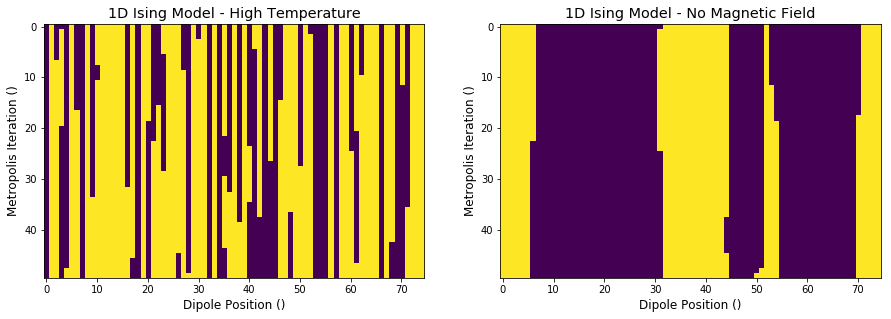

In [13]:
'''Create plot'''
plt.figure(figsize=(15, 7)) # Set the plot size

#Low B field. High temp. No interaction between neighbors.
plt.subplot(1, 2, 1)
plt.xlabel('Dipole Position ()', fontsize='large')
plt.ylabel('Metropolis Iteration ()', fontsize='large')
plt.title('1D Ising Model - High Temperature', fontsize='x-large')
RING1 = IsingRing(N=75, B=0.01, T=373, J=0) # 100 degree celsius
RING1.run_until_equilibrium(num_iterations=750) # 10*N = 750
plt.imshow(RING1.get_sequence(50))

# High B field. Low temp. Interaction between neighbors. Expect Majority aligned
# but interaction may keep some antialigned
plt.subplot(1, 2, 2)
plt.xlabel('Dipole Position ()', fontsize='large')
plt.ylabel('Metropolis Iteration ()', fontsize='large')
plt.title('1D Ising Model - No Magnetic Field', fontsize='x-large')
RING2 = IsingRing(N=75, B=0, T=300, J=1) # No magnetic field
RING2.run_until_equilibrium(num_iterations=750) # 10*N = 750
plt.imshow(RING2.get_sequence(50))

plt.show()


The one-dimensional wrap around ring is behaving as expected. Although the random nature of the code yields different results every time, it is expected the the left plot (high temperature) will show the occasional dipole that "spontaneously" flips to a high energy state. Further, the right plot has the expected spin-up and spin-down regions, which are produced by the sole interaction energy in the abscence of a magnetic field.

We are now in a position where we can apply what we have learned so far, and extend the model to 2-dimensions.

#### Question: Write python code to implement the Ising model on a 51x49 grid for arbitrary J and B.  Use 200 sweeps to thermalize and assume that the grid is randomized after 20 sweeps.

The model constructed for the one-dimensional case can be extended to two-dimensions with a few adjustments.

In [14]:
'''Define 2D Ising Model Class'''
class IsingModel():
    '''
    Class implements a model for a two-dimensional Ising Model. Instance functions
    include; set_b_field (the magnetic field can be changed after instantiating),
    randomize_state (random spin configuration), spin_flip (flip spin of 1 or more
    dipoles when running metropolis algorithm), ising_step (advanced the state
    of the system using the metropolis model), and plot_state (plot the spin
    configuration)
    '''
    k = 8.6173303*10**(-5) # Boltzmann constant (eV/K)

    def __init__(self, B, T, J, shape):
        '''
        Constructor initializes B, T, J variables
        Parameters
            B: Magnetic field (eV/Am^2)
            T: Temperature in Kelvin
            J: Interaction constant
            shape: Dimensions of row and colums of 2D grid
        '''
        self.b_val = B # Magentic Field (eV/Am^2)
        self.t_val = T # Temperature (K)
        self.j_val = J # Interaction Constant
        self.nx_val, self.ny_val = shape # Number of row, number of columns

        self.randomize_state() # Randomize the spin configuration

        # A modification to the metropolis algorithm is made here. Instead of
        # selecting only one dipole to flip its spin, ~5% of the dipoles in the
        # system are flipped. The ensures equilbirium is attained in the 200
        # sweeps suggested by professor.
        self.nsites = int(0.05 * self.state.size)

    def set_b_field(self, field):
        '''
        Setter method for setting the magnetic field
        Parameter, field: magnetic field (eV/Am^2)
        '''
        self.b_val = field

    def randomize_state(self):
        '''
        Randomly assign +1 spin or -1 spin to each dipole in the system
        '''
        # Function selects 0 or 2, then subtracts 1 to get either +1 or -1
        self.state = 2*np.random.randint(2, size=(self.nx_val, self.ny_val))-1

    def spin_flip(self, nearspins):
        '''
        Function used in the metropolis algorithm.
        Parameters
            nearspins: corresponds to the total sum of the neighboring spins, where
        the closests 4 neighbors are considered. The metropolis algorithm has been modified
        such that multiple (~5%) of the dipoles are flipped in the trial configuration.
        The probability of acceptance is based on the total energy difference,
        which is in turn a function of the neighboring spins.
        Returns
            Either spin up or spin down, calculated in same fashion as the randomize state function.
        '''
        nspins = len(nearspins) # Total number of neighbors considered
        # Energy state considers total magnetic energy component and only the
        # interaction energy assocaited with the randomly selected dipoles
        # (and their neighbors)
        local_field = self.j_val*nearspins + self.b_val

        # Relative probability of current and trial states given that energy difference comes from
        # flipping random dipole(s)
        probability_plus = 1.0 / (1.0 + np.exp(-2*local_field/self.t_val))

        # Either +1 spin or -1 spin is returned. Initial calculation computes
        # either 0 or 1. The result is multiplied by 2 and one is subtracted,
        # leaving +1 or -1
        spin_up = probability_plus > np.random.rand(nspins)
        return 2*spin_up - 1

    def ising_step(self):
        '''
        Function uses metropolis algorithm to advance the state of the Ising model.
        '''
        # Instead of a single dipole, multiple (~5%) random dipoles are selected to be
        # flipped in a trial configuration. nsites dipoles are selected using the
        # random.rand function. The result is an array of numbers form 0-1. This
        # array is multiplied by the dimension of the grid, for which the indices
        # correspond to. Finally, .astype(np.int) typecasts these numbers to
        # integers, as the grid indices are integers.
        xx = (np.random.rand(self.nsites)*self.nx_val).astype(np.int)
        yy = (np.random.rand(self.nsites)*self.ny_val).astype(np.int)

        # For each random index in (xx,yy) the spin configurations of its neighbors
        # are summed. This count is passed and used in the ising_flip function.
        # The modulo operator ensures that a dipole on the boundary has all 4
        # neighbors by wrapping around to oppoiste side of array (just like we
        # used in the Game of Life)
        nn = self.state[xx, (yy+1)%self.ny_val] + self.state[xx, yy-1] \
        + self.state[(xx+1)%self.nx_val, yy] + self.state[xx-1, yy]
        self.state[xx, yy] = self.spin_flip(nn)

    def equilibriate_system(self, nsteps=200):
        '''
        Function advances the state of the system by an arbitrary number of
        iterations of the metropolis algorithm
        Parameters
            nsteps: number of metropolis iterations
        '''
        for _ in range(nsteps):
            self.ising_step()

    def plot_state(self):
        '''
        Plot the current state of the IsingModel object
        '''
        plt.imshow(self.state)
        

#### Question: Produce plots for J=(kB T), B=0, B=+0.5, B=-0.5

Note: I am reading this as J = Boltzmann Constant * Temperature

Now that we have the IsingModel class defined, we can run a few tests to see if it behaving as expected. To start, we will examine the effect that the magnetic field has on the dipole alignment, for B=0, -0.5, and 0.5 (eV/Am^2). It is expected that for a low temperature, having no magnetic field will result in a random alignment of spins. For positive and negative magnetic fields, we expected to see a tren in the alignment; the majority aligned for positive magnetic field and the majority antialigned for negative magnetic field.

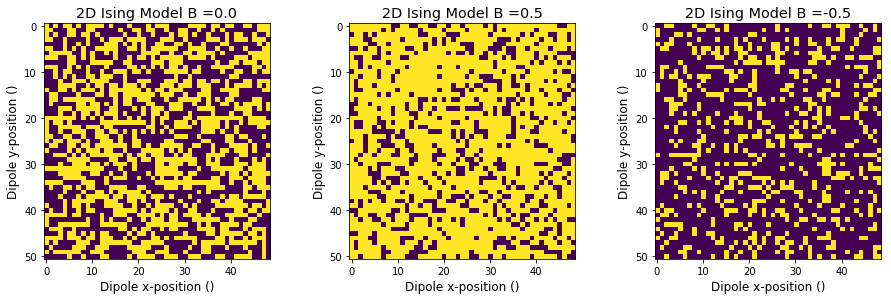

In [15]:
'''Create plot'''
plt.figure(figsize=(15, 7)) # Set the plot size
B_VALS = [0.0, 0.5, -0.5]

for i in range(3):
    ising_object = IsingModel(B=B_VALS[i], T=1, J=IsingModel.k*T, shape=(51, 49))
    ising_object.equilibriate_system()

    plt.subplot(1, 3, i+1)
    plt.xlabel('Dipole x-position ()', fontsize='large')
    plt.ylabel('Dipole y-position ()', fontsize='large')
    plt.title('2D Ising Model B =' + str(B_VALS[i]), fontsize='x-large')
    ising_object.plot_state()
plt.subplots_adjust(wspace=0.35)


These first plots indicate that the system has been properly implemented. The case of no magnetic field shows a very random alignment of poles and there is definitely a trend toward aligned/ antialigned for the applied magnetic field cases.

#### Question: For B=0 and J/(T kB)=range(0.0, 0.6, 21), calculate and plot the average magnetization M versus J/TkB.

After some research on which values to use$^4$ it was noted that the critical temperature $T=2.5J$ should be investigated. The largest temperature was taken to be twice this critical temperature, and $J$ was calculated. Finally, the low temperature was obtained using $J$ and by the range specified in the question.

Using T=5
$$ \frac{J}{T k_B} = 0.1 \Rightarrow J = 0.1(5)k_B=4.3e-6 $$

$$ T_{low} = \frac{4.3e-6}{0.6 k_B} = 0.83 $$

Thus we will use a temperatures in the range $[0.83, 5]$ and $J=4.3e-6$

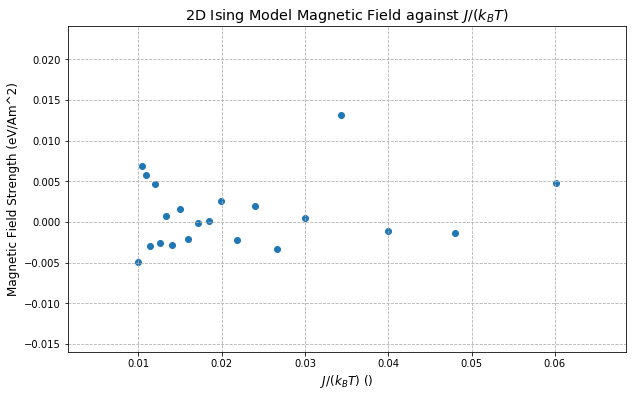

In [17]:
'''Create plot'''
plt.figure(figsize=(10, 6)) # Set the plot size

T_VALS = np.linspace(0.83, 5.0, 21) # temperature range calculated above
M = [] # empty list for magnetic field strength
SAMPLE_SIZE = 50 # Sample sized used to find average magnetic field
J_VAL = 4.3e-6 # Ineraction constant calculated above

for t in T_VALS:
    m_val = 0 # Keep a running sum of magnetic field strength (average at end of iteration)
    ising_object = IsingModel(B=0.0, T=t, J=J_VAL, shape=(51, 49)) # Instantiate IsingModel
    ising_object.equilibriate_system(24990) # 10N = 10(51)(49) = 24990

    # For each temperature get 50 samples, calculate magnetic field strength and determine average
    for _ in range(SAMPLE_SIZE):
        ising_object.equilibriate_system(20)
        m_val += np.sum(ising_object.state)/np.size(ising_object.state)
    M.append(m_val/float(SAMPLE_SIZE)) # Add average magnetic field strength to list

# We are plotting J/(k_B * temperature) so the x-values are calculated using list comprehension
XS = [J_VAL/(IsingModel.k*t_val) for t_val in T_VALS]

plt.scatter(XS, M) # Plot data

# Customize Graph
plt.xlabel('$J/(k_B T)$ ()', fontsize='large')
plt.ylabel('Magnetic Field Strength (eV/Am^2)', fontsize='large')
plt.title('2D Ising Model Magnetic Field against $J/(k_B T)$', fontsize='x-large')
plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

plt.show()


We can see that the average net magnetizing of the material oscillates around zero. The fact that there is no net magnetization is consistent with our expectations, as the lack of applied magnetic field should result in no majority of dipole alignment.

While attempting this question, it became clear that a good way to demonstrate that as the temperature is increased, the net magnetization tends toward zero. This is true becuase the dipoles are more likely to flip to a higher energy state, for high temperatures. The following plot displays this idea nicely.

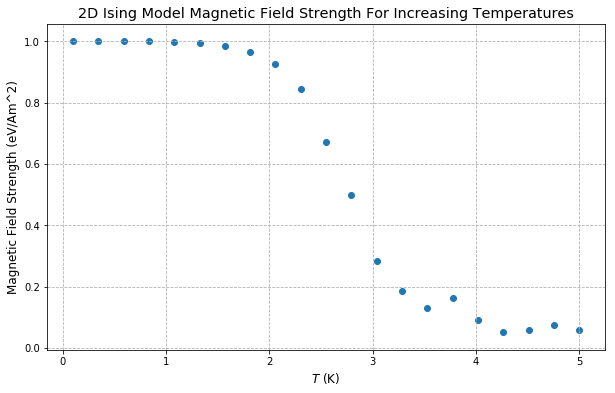

In [19]:
'''Create plot'''
plt.figure(figsize=(10, 6)) # Set the plot size

T_VALS = np.linspace(0.1, 5.0, 21)
M = []
SAMPLE_SIZE = 50

for t in T_VALS:
    m_val = 0
    ising_object = IsingModel(B=0.1, T=t, J=1, shape=(51, 49))
    ising_object.equilibriate_system(24990)
    for _ in range(SAMPLE_SIZE):
        ising_object.equilibriate_system(20)
        m_val += np.sum(ising_object.state)/np.size(ising_object.state)
    M.append(m_val/float(SAMPLE_SIZE))

plt.scatter(T_VALS, M)

# Customize Graph
plt.xlabel('$T$ (K)', fontsize='large')
plt.ylabel('Magnetic Field Strength (eV/Am^2)', fontsize='large')
plt.title('2D Ising Model Magnetic Field Strength For Increasing Temperatures', fontsize='x-large')
plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

plt.show()


#### Question: Produce a hysteresis curve over an appropriate range of external magnetic field B values.

Recall from PHYS 397 that to produce a hystheresis curve, we must first apply a magnetic field to reach the "outer loop", reverse the direction and make a sequence of steps, and again reverse the direction and makes the reverse steps. Thus, the path is composed of 3 distinct sections, as the following code implements. 

In [20]:
'''Calculate Values Used in the Hysteresis Loop'''
ISING = IsingModel(B=0.0, T=t, J=0.01, shape=(51, 49))
ISING.equilibriate_system(24990)

C1 = np.linspace(0, 10.0, 11) # First portion of the loop
C2 = np.linspace(10.0, -10.0, 21) # Second portion of the loop
C3 = np.linspace(-10.0, 10.0, 21) # Third portion of the loop

B_VALS = np.concatenate((C1, C2, C3)) # Create total loop path

M_VALS = [] # Empty list for net magnetization

for b_field in B_VALS:
    m_val = 0
    ISING.set_b_field(b_field)

    for i in range(5):
        ISING.equilibriate_system(20)
        m_val += np.sum(ISING.state)/np.size(ISING.state)
    M_VALS.append(m_val/5.0)


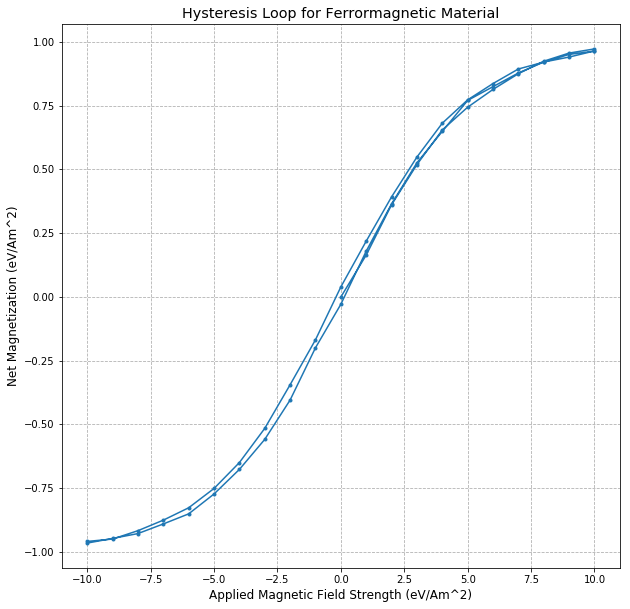

In [23]:
'''Create plot'''
plt.figure(figsize=(10, 10)) # Set the plot size
plt.plot(B_VALS, M_VALS, marker=".")

# Customize Graph
plt.xlabel('Applied Magnetic Field Strength (eV/Am^2)', fontsize='large')
plt.ylabel('Net Magnetization (eV/Am^2)', fontsize='large')
plt.title('Hysteresis Loop for Ferrormagnetic Material', fontsize='x-large')
plt.grid(linestyle='dashed') # Add grid with dashed lines to graph

plt.show()


The loop looks exactly like we found the PHYS 397 lab! Seems the our model is behaving as expected.

#### Question: Examine Antiferromagnetic materials.

Finally, we will plot negative values of the ineraction constant. This simulates anti-ferro magnetic materials. Below the critical temperature, these materials will always have oppositely aligned diploes, which maximizes the energy. To start, we will plot a range of magnetic fields. We expect that this behave similar to the case of $J>0$ as done above.

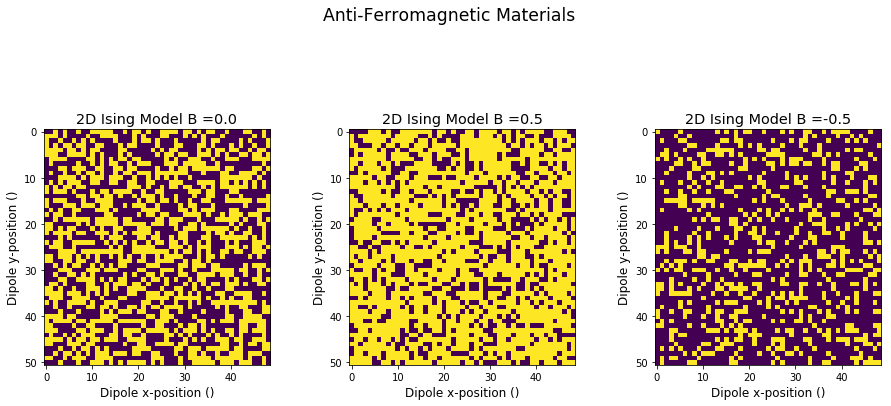

In [24]:
'''Create plot'''
FIG = plt.figure(figsize=(15, 7)) # Set the plot size
FIG.suptitle('Anti-Ferromagnetic Materials', fontsize='xx-large')

B_VALS = [0.0, 0.5, -0.5]

for i in range(3):
    ising_object = IsingModel(B=B_VALS[i], T=1, J=-IsingModel.k*T, shape=(51, 49))
    ising_object.equilibriate_system()

    plt.subplot(1, 3, i+1)
    plt.xlabel('Dipole x-position ()', fontsize='large')
    plt.ylabel('Dipole y-position ()', fontsize='large')
    plt.title('2D Ising Model B =' + str(B_VALS[i]), fontsize='x-large')
    ising_object.plot_state()
plt.subplots_adjust(wspace=0.35)


Indeed, we have similar results to the plots for ferro-magnetic fields, produced above. TO get a better feeling for how these materials behave differently from ferro-magnetic materials, we will plot a range of low temperatures (close to the critical temperature value).

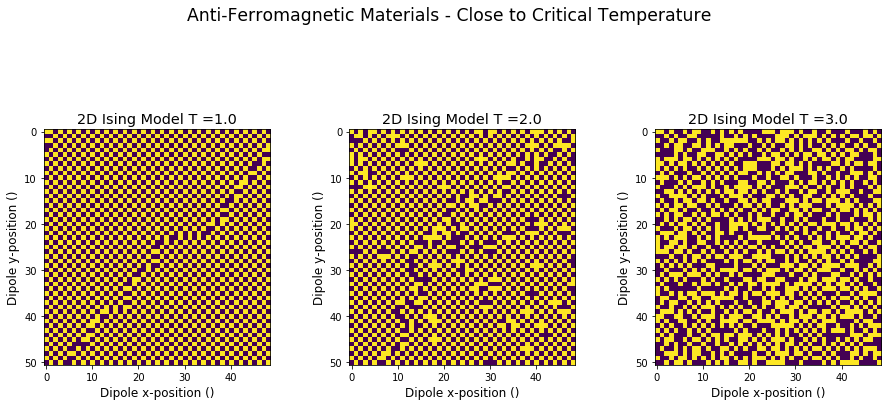

In [26]:
'''Create plot'''
FIG = plt.figure(figsize=(15, 7)) # Set the plot size
FIG.suptitle('Anti-Ferromagnetic Materials - Close to Critical Temperature', fontsize='xx-large')
T_VALS = [1.0, 2.0, 3.0]

for i in range(3):
    ising_object = IsingModel(B=0.0, T=T_VALS[i], J=-1, shape=(51, 49))
    ising_object.equilibriate_system(24990)

    plt.subplot(1, 3, i+1)
    plt.xlabel('Dipole x-position ()', fontsize='large')
    plt.ylabel('Dipole y-position ()', fontsize='large')
    plt.title('2D Ising Model T =' + str(T_VALS[i]), fontsize='x-large')
    ising_object.plot_state()
plt.subplots_adjust(wspace=0.35)


These plots really demonstrate the difference between the two types of materials. The "checkboard" pattern observed here is a result of the anti-ferromagnetic material's dipoles tendency to be anti-aligned from their neighbors. 

### Conclusion

From the behavior we have investigated, it appears that our model of a magnetic material has been implemented correctly. This was no small task! Going through the assignment, piece by piece, was definitely essential- as each question built off the previous. Trying to jump straight into the two-dimensional case would have been extremely difficult.

It is encouraging to see that our python skills have progressed to a point where it was possible to get through this report. Most notably; using class to organize the ideas was extremely helpful.

Can't wait to see what's next!


### References
[1] - Landau R. H. (2015) $\textit{Computational Physics. Problem Solving with Python}$. Wiley-VCH. Weinheim Germany.

[2] - https://docs.python.org/2/library/itertools.html#itertools.product

[3] - Newman M. (2013) $\textit{Computational Physics}$. University of Michigan.

[4] - http://inside.mines.edu/~kbachman/UCD_Math/public_html/IsingInfo.html